## Import dependencies

In [93]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Step 01
- read data
- convert datetimes
- convert 'tokens' to lists

In [94]:
dataframe = pd.read_csv('./Divar_task/divar_data.csv')

In [95]:
# Function to convert token strings to lists
def convert_tokens(tokens):
    # Check if tokens is a string
    if isinstance(tokens, str):
        # Remove brackets and split by comma
        tokens_cleaned = tokens.replace('[', '').replace(']', '').strip()
        # Split the cleaned string into a list
        return [token.strip() for token in tokens_cleaned.split(',') if token.strip()]  # Avoid empty strings
    return []  


In [96]:
dataframe['created_at'] = pd.to_datetime(dataframe['created_at'], unit='ms')
dataframe['tokens'] = dataframe['tokens'].apply(convert_tokens)
dataframe.head()

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,2021-01-02 01:13:20,1575558c-a702-46ef-8e18-bc5cef761473,Ed9EADRZRXCHcrcEP_Hnkg,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",NaN,NaN
1,load_post_page,2021-01-02 01:13:20,0fd004f4-ce9b-4766-ac96-7578dedebacb,5aVIp_PNSAWxqwBETYpmxQ,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",NaN,NaN
2,load_post_page,2021-01-02 01:13:20,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,mt0UAT4AQe2dECdXBvKYBA,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",NaN,NaN
3,load_post_page,2021-01-02 01:13:20,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,huSKUX-mSwyUcGzgSbXX6g,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",NaN,NaN
4,load_post_page,2021-01-02 01:13:20,6c390fce-34b6-4e19-837e-6bc295a72514,sL5fLDdoR9a7aDGPP8N-jA,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",NaN,NaN


In [97]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111083 entries, 0 to 111082
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   action                   111083 non-null  object        
 1   created_at               111083 non-null  datetime64[ns]
 2   source_event_id          111083 non-null  object        
 3   device_id                111083 non-null  object        
 4   post_page_offset         35287 non-null   float64       
 5   tokens                   111083 non-null  object        
 6   post_index_in_post_list  75796 non-null   float64       
 7   post_token               75796 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 6.8+ MB


In [98]:
# Function to summarize user activity overview
def summarize_user_activity(data):
    number_of_users = len(data['device_id'].unique())
    time_span = data['created_at'].max() - data['created_at'].min()
    total_hours = time_span.components.hours + (time_span.days * 24)
    total_minutes = time_span.components.minutes
    
    # Group by 'device_id' and count the number of actions each user took
    user_action_counts = data.groupby('device_id').size().reset_index(name='num_actions')
    
    # Calculate the total sum of all actions
    total_actions = user_action_counts['num_actions'].sum()
    
    print(f"This data has records of {number_of_users} users, "
          f"for {total_hours} hours and {total_minutes} minutes, "
          f"starting from {data['created_at'].min()} to {data['created_at'].max()},\n"
          f"The actual time of user activities we have is {int(total_actions / 3600)} hours, {int((total_actions % 3600) / 60)} minutes, and {total_actions % 60} seconds.")

summarize_user_activity(dataframe)

This data has records of 5013 users, for 47 hours and 13 minutes, starting from 2021-01-01 00:13:20 to 2021-01-02 23:26:40,
The actual time of user activities we have is 30 hours, 51 minutes, and 23 seconds.


Based on this summary, we expect each user to spend about 0.22 minutes (or about 22 seconds) on website, but lets talk with data!

In [99]:
def user_active_time(data):
    """
    Calculate the total number of actions each user took which shows the time the user spent on Divar
    
    Parameters:
    - data: DataFrame containing 'device_id' 
    
    Returns:
    - DataFrame with 'device_id' and 'time_spent' showing the time spent by users on Divar in seconds
    """
    # Group by 'device_id' and count the number of actions for each user
    user_action_counts = data.groupby('device_id').size().reset_index(name='time_spent(s)')

    # Return the DataFrame with 'device_id' and 'num_actions'
    return user_action_counts

# Example usage
user_spent_time_df = user_active_time(dataframe)
sorted_user_spent_time_df = user_spent_time_df.sort_values(by='time_spent(s)', ascending=False)


In [100]:
sorted_user_spent_time_df.head(10)

,device_id,time_spent(s)
0,#NAME?,1487
4808,xDpNOwohTt2TsVq5EEVpHQ,293
4773,wgrsKZJeRtWstNgrSpO00g,267
982,BkKsm5slS86ZyXG8BKy7rQ,258
4098,nwRhki1CS-uGMXEMDmTSxg,255
453,5Kn1FI7BQPmL4xFG1iaLeg,228
3505,g6BqduZfTzCvnoK50ipwNg,221
315,3fMzOsSZQQGTqhURGW080w,219
659,7irRnmDfSjqwxi_CeP4H_A,209
3907,lPAkGiblTxCZbiguhCZL1g,202


In [101]:
def plot_histogram(df, col, labels, title, bins=30, showlegend=False):
    # Create a histogram
    fig = px.histogram(df, 
                       x=col,
                       title=title,
                       labels=labels,
                       nbins=bins,  
                       color_discrete_sequence=['orange']) 

    # Update layout
    fig.update_layout(
        xaxis_title=labels['x-label'],
        yaxis_title='Count',
        plot_bgcolor='rgba(0,0,0,0)',  
        showlegend=showlegend 
    )

    # Show the plot
    fig.show()

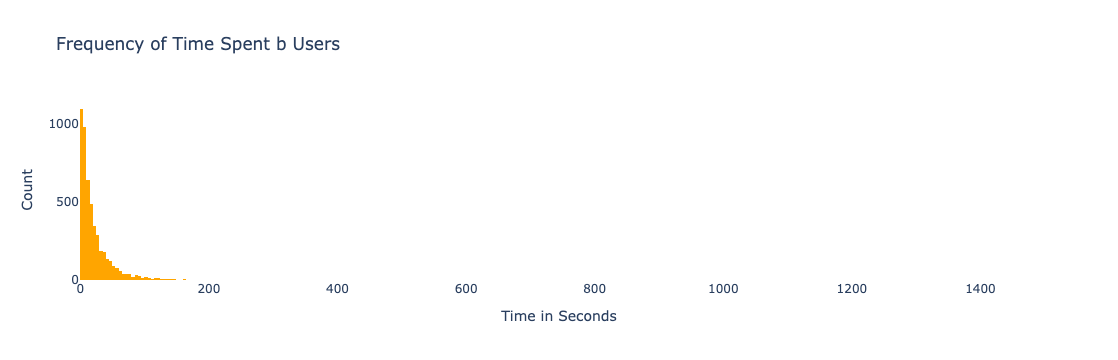

In [102]:
plot_histogram(user_spent_time_df, col='time_spent(s)', labels={'x-label': 'Time in Seconds', 'y-label': 'Time in Seconds'}, title="Frequency of Time Spent b Users", bins=500)

In [104]:
user_spent_time_df.describe()

,time_spent(s)
count,5013.000000
mean,22.158987
std,33.853312
min,1.000000
25%,5.000000
50%,13.000000
75%,28.000000
max,1487.000000


We can conclude that, 
- Majority of users spend relatively little time: With the median time at 13 seconds and 75% of users spending 28 seconds or less.
  
- Large variation in time spent: The high standard deviation (33.85 seconds) and a long tail (maximum of 1487 seconds) indicate that a small subset of users spend significantly more time compared to the majority.
  
- Bots: With only eight distinct interaction times and some users engaging over 30 times, it's unlikely that a human could interact this frequently in just a few seconds, suggesting bot activity. Users spending close to the maximum time (24.8 minutes) may be classified as "bots," contributing disproportionately to overall engagement.

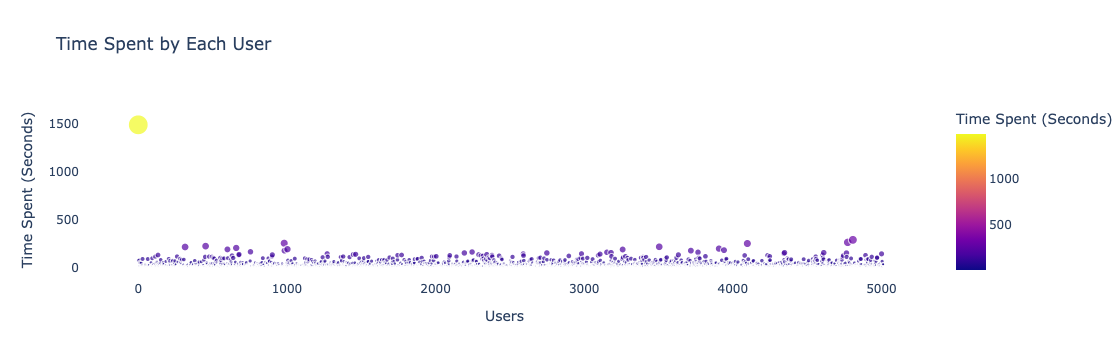

In [123]:
import plotly.express as px

def plot_time_spent_by_user(time_spent_df):
    """
    Plot the time spent by each user using Plotly.
    
    Parameters:
    - time_spent_df: DataFrame with 'device_id' and 'time_spent_minutes' columns
    """
    # Create a scatter plot for time spent by each user
    fig = px.scatter(time_spent_df, 
                     x=time_spent_df.index, 
                     y='time_spent(s)',
                     title='Time Spent by Each User',
                     labels={ 'time_spent(s)': 'Time Spent (Seconds)', 'device_id': 'Device ID'},
                     size='time_spent(s)',  # Optional: scale point size by time spent
                     color='time_spent(s)',  # Optional: color points by time spent
                     hover_data=['time_spent(s)'])

    # Update the layout for better readability
    fig.update_layout(
        xaxis_title='Users',
        yaxis_title='Time Spent (Seconds)',
        plot_bgcolor='rgba(0,0,0,0)',  # Optional: transparent background
        showlegend=False
    )

    # Show the plot
    fig.show()

plot_time_spent_by_user(user_spent_time_df)


In [124]:
def bot_identifier(df):
    
    return df.loc[df['time_spent(s)'].idxmax()]['device_id']

In [125]:
bot_id = bot_identifier(user_spent_time_df)

In [126]:
bot_df = dataframe.loc[dataframe['device_id'] == bot_id]

In [127]:
bot_df.head()

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token
30,load_post_page,2021-01-01 22:26:40,1f7d05a1-a65d-40d5-b0c7-8aa7c9904052,#NAME?,30.0,"[wXqHuuPP, wXqD-7ES, wXq_dCXM, wXqvtwYd, wXqTN...",NaN,NaN
49,load_post_page,2021-01-02 01:13:20,b3c190ef-94c0-4983-ac18-6fea54a89b22,#NAME?,0.0,"[wXvnV_cv, wXv3VGI6, wXvP2oHU, wXv_ji--, wXvb3...",NaN,NaN
59,load_post_page,2021-01-02 01:13:20,9895efc1-5018-4312-b344-a7ce57d73c9b,#NAME?,0.0,"[wXvj6lih, wXvHaMTh, wXvT6QAp, wXvTKwbr, wXvPK...",NaN,NaN
168,load_post_page,2021-01-02 01:13:20,9895efc1-5018-4312-b344-a7ce57d73c9b,#NAME?,5.0,"[wXvPmynJ, wXvXWgFe, wXvXGZ-z, wXvb2dC4, wXvLW...",NaN,NaN
211,load_post_page,2021-01-02 01:13:20,a131cdc3-1de0-4f6b-bb43-cfbaec1d6272,#NAME?,2.0,"[wXbXjnLg, wXvLZHEH, wXkLftaE, wXvHphwq, wXvnY...",NaN,NaN


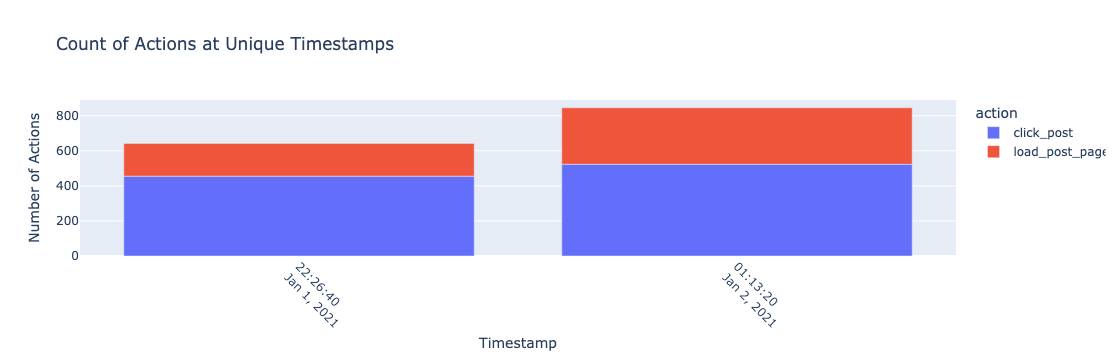

In [128]:
import pandas as pd
import plotly.express as px

def plot_actions_at_unique_times(data):
    """
    Plot the count of actions at unique timestamps using a bar plot,
    separating the counts by action type.

    Parameters:
    - data: DataFrame containing 'created_at' and 'action' columns.
    """
    # Count actions for each unique timestamp and action type
    action_counts = data.groupby([data['created_at'].dt.floor('S'), 'action']).size().reset_index(name='action_count')

    # Create a bar plot using Plotly Express
    fig = px.bar(action_counts,
                 x='created_at',
                 y='action_count',
                 color='action',  # Separate counts by action type
                 title='Count of Actions at Unique Timestamps',
                 labels={'created_at': 'Timestamp', 'action_count': 'Number of Actions'})

    # Customize the layout
    fig.update_layout(
        xaxis_title='Timestamp',
        yaxis_title='Number of Actions',
        xaxis=dict(tickmode='array', tickvals=action_counts['created_at'], tickangle=45),  # Rotate x-axis labels for readability
        showlegend=True
    )

    # Show the plot
    fig.show()


plot_actions_at_unique_times(bot_df)


In [129]:
clean_dataframe = dataframe.loc[dataframe['device_id'] != bot_id]

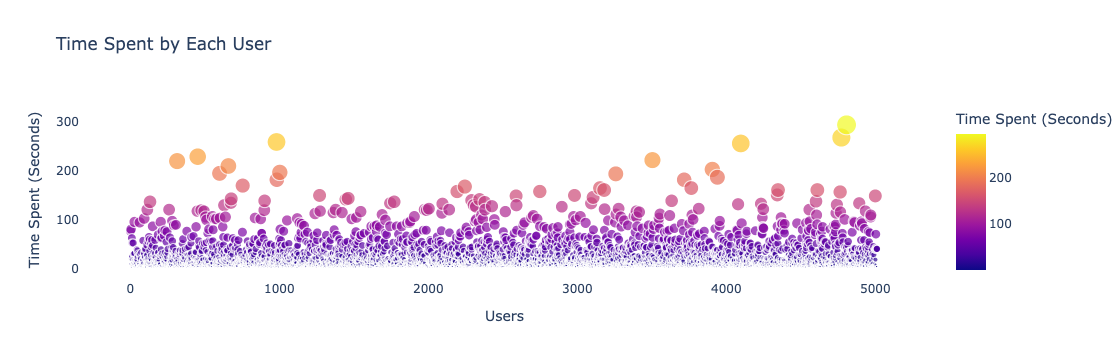

In [130]:
user_spent_time_df_clean = user_active_time(clean_dataframe)
plot_time_spent_by_user(user_spent_time_df_clean)

Now it looks more normal. However, if an active bot is interacting with our system, it could change its device ID to keep engaging. To investigate this, we can analyze patterns in device ID changes and interaction frequency.

In [134]:
user_spent_time_df_clean.sort_values(by='time_spent(s)', ascending=False)

,device_id,time_spent(s)
4807,xDpNOwohTt2TsVq5EEVpHQ,293
4772,wgrsKZJeRtWstNgrSpO00g,267
981,BkKsm5slS86ZyXG8BKy7rQ,258
4097,nwRhki1CS-uGMXEMDmTSxg,255
452,5Kn1FI7BQPmL4xFG1iaLeg,228
...,...,...
3367,eSfXAYgDRXmWK037GAWu0g,1
337,41Owu0a2SReF8drEXo7Q6g,1
1560,JPGuBsbDTVKd782d5QQSEw,1
2139,Qg-a5MzIREeL7PWAm8QQsA,1
